# Grundgerüst Leistungsausweis
Dieses Notebook soll euch als Grundgerüst für euren Leistungsnachweis dienen. Es soll euch eine Idee/ Hilfestellung bieten, wie man einen neuen Datensatz, basierend auf einer Fragestellung, strukturiert analysieren und interpretieren kann. Wie besagt, dient das Notebook als Hilfestellung, ist jedoch keinenfalls vollständig ausgeschöpft. In diesem Sinne dürft ihr auch gerne Sachen miteinbeziehen, welche hier nicht genannt werden. 

-> Bitte schreibt die Antwort zu den jeweiligen Punkten an oberster Stelle unterhalb der Titel (so wie dies auch im Leistungsnachweisbeispiel gemacht wurde).


## Struktur
1. Fragestellung(en) und Datenbeschaffung
2. Daten laden
3. Daten vorbereiten
4. Statistik der Rohdaten (Generell im Longformat)
5. Analyse der Daten

**Wichtig:** Alle graphischen Darstellungen sollten mindestens *Titel, Ticks- und Achsenbeschriftung* beinhalten (Siehe plots im Leistungsnachweisbeispiel)

---

## 1. Fragestellung(en) und Datenbeschaffung
### 1.1 Titel: 
- "HIV-Verlauf in Europa den letzten 35 Jahren"
### 1.2 Fragestellung:
1. Wo in Europa waren die meisten Menschen betroffen und warum? 
2. Ab wann konnten die Ansteckungen reduziert werden und wie?
### 1.3 Datenquelle(n):
Datenquelle:
- https://ourworldindata.org





### 1.4 Daten beschaffen und laden

In [ ]:

!pip install pandas
!pip install seaborn
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

### 1.5 Alle Daten gefiltert auf Europäische Länder

In [107]:
import pandas as pd

df = pd.read_csv("https://ourworldindata.org/grapher/share-of-the-population-infected-with-hiv.csv")

europe = [
    "Austria","Belgium","France","Germany","Liechtenstein","Luxembourg","Monaco",
    "Netherlands","Switzerland","Albania","Andorra","Bosnia and Herzegovina",
    "Croatia","Greece","Italy","Malta","Montenegro","North Macedonia","Portugal",
    "San Marino","Serbia","Slovenia","Spain","Vatican","Denmark","Estonia","Finland",
    "Iceland","Ireland","Latvia","Lithuania","Norway","Sweden","United Kingdom",
    "Belarus","Bulgaria","Czechia","Hungary","Moldova","Poland","Romania",
    "Russia","Slovakia","Ukraine"
]

df = df[df["Entity"].isin(europe)]

max_year = df["Year"].max()
df = df[df["Year"] >= max_year - 35]

df



,Entity,Code,Year,HIV prevalence - Sex: total - Age: 15-49 - Central estimate
34,Albania,ALB,1990,0.00064
35,Albania,ALB,1991,0.00070
36,Albania,ALB,1992,0.00090
37,Albania,ALB,1993,0.00123
38,Albania,ALB,1994,0.00175
...,...,...,...,...
5572,Ukraine,UKR,2017,0.96346
5573,Ukraine,UKR,2018,0.96401
5574,Ukraine,UKR,2019,0.96433
5575,Ukraine,UKR,2020,0.96143


## 2. Daten vorbereiten 
- Welches Format hat mein Datensatz bzw. wie sind meine Kolumnen strukturiert?
- Welches Format kann ich für welche Teilschritte verwenden (wann soll ich pivot bzw. wide format verwenden)?
- Welche Datentypen kommen in meinem Datensatz vor?

- Daten werden eingeschränkt in die grössten europäischen Länder, wobei 10 davon Daten entahlten
- Für eine übersichtlichere Darstellung werden die Daten als Pivot-Format formatiert. Einmal mit den Jahren oben und die Länder auf der Seite und einmal umgekehrt
- Als Datentypen sind folgende entahlten, welche noch unten in einer Tabelle zu sehen sind:
1. Eingebaute Python-Typen:	list, str, int, bool, ValueError
2. Pandas-Typen: DataFrame, Series, Index
3. NumPy-Typen: (intern)	numpy.int64, numpy.float64, numpy.bool_

In [271]:
import pandas as pd

data = {
    "Bereich": [
        "Eingebaute Python-Typen",
        "Pandas-Typen",
        "NumPy-Typen (intern)"
    ],
    "Typen": [
        "list, str, int, bool, ValueError",
        "DataFrame, Series, Index",
        "numpy.int64, numpy.float64, numpy.bool_"
    ]
}
summary_df = pd.DataFrame(data)
print("Übersicht verwendeter Datentypen:")
display(summary_df)



Übersicht verwendeter Datentypen:


,Bereich,Typen
0,Eingebaute Python-Typen,"list, str, int, bool, ValueError"
1,Pandas-Typen,"DataFrame, Series, Index"
2,NumPy-Typen (intern),"numpy.int64, numpy.float64, numpy.bool_"


In [353]:
print("Länder im Filter:", selected_countries)
print("Länder mit Daten:", df["Entity"].unique())
print("Anzahl Länder mit Daten:", len(df["Entity"].unique()))

Länder im Filter: ['Switzerland', 'Germany', 'Spain', 'Portugal', 'France', 'Italy', 'United Kingdom', 'Netherlands', 'Belgium', 'Poland', 'Sweden', 'Finland', 'Norway', 'Denmark', 'Russia', 'Ukraine', 'Greece']
Länder mit Daten: ['Belgium' 'Denmark' 'France' 'Germany' 'Greece' 'Italy' 'Netherlands'
 'Norway' 'Portugal' 'Spain' 'Switzerland']
Anzahl Länder mit Daten: 11


In [354]:
pivot_transposed = pivot_df.transpose()

print("Transponierte Pivot-Tabelle (Jahre als Zeilen, Länder als Spalten):")
display(pivot_transposed)

Transponierte Pivot-Tabelle (Jahre als Zeilen, Länder als Spalten):


Entity,Switzerland,Germany,Spain,Portugal,France,Italy,United Kingdom,Netherlands,Belgium,Poland,Sweden,Finland,Norway,Denmark,Russia,Ukraine,Greece
Year,,,,,,,,,,,,,,,,,
1990,0.14026,NaN,0.36509,0.24294,0.12917,0.16515,NaN,0.08114,0.05354,NaN,NaN,NaN,0.03566,0.08188,NaN,NaN,0.01936
1991,0.15662,NaN,0.41056,0.29359,0.13886,0.17048,NaN,0.08079,0.05470,NaN,NaN,NaN,0.03813,0.08689,NaN,NaN,0.02414
1992,0.17123,NaN,0.44296,0.33898,0.14743,0.17430,NaN,0.08023,0.05625,NaN,NaN,NaN,0.03983,0.09109,NaN,NaN,0.02938
1993,0.18419,NaN,0.46237,0.37916,0.15493,0.17685,NaN,0.07986,0.05800,NaN,NaN,NaN,0.04085,0.09444,NaN,NaN,0.03486
1994,0.19496,NaN,0.47048,0.41382,0.16141,0.17837,NaN,0.07983,0.06011,NaN,NaN,NaN,0.04145,0.09708,NaN,NaN,0.04031
1995,0.20304,NaN,0.46916,0.44262,0.16686,0.17903,NaN,0.07997,0.06389,NaN,NaN,NaN,0.04179,0.09905,NaN,NaN,0.04667
1996,0.21162,NaN,0.46680,0.46600,0.17141,0.17973,NaN,0.08345,0.06941,NaN,NaN,NaN,0.04307,0.10044,NaN,NaN,0.05304
1997,0.22134,NaN,0.46651,0.48675,0.17819,0.18242,NaN,0.08972,0.07574,NaN,NaN,NaN,0.04544,0.10549,NaN,NaN,0.05885
1998,0.23018,NaN,0.46649,0.50728,0.18789,0.18779,NaN,0.09676,0.08254,NaN,NaN,NaN,0.04848,0.11194,NaN,NaN,0.06394


### Durchschnitt der Infektionen über die 35 Jahre pro Land

In [355]:
import pandas as pd


df = df[df["Entity"].isin(selected_countries)]

hiv_col = [c for c in df.columns if "hiv" in c.lower()][0]

avg_df = df.groupby("Entity")[hiv_col].mean().reset_index()
avg_df = avg_df.rename(columns={hiv_col: "Durchschnitt HIV-Infektion (%)"})

avg_df = avg_df.sort_values("Durchschnitt HIV-Infektion (%)", ascending=False)

print("Durchschnittliche HIV-Infektion pro Land (letzte 35 Jahre):")
print(avg_df.to_string(index=False))


Durchschnittliche HIV-Infektion pro Land (letzte 35 Jahre):
     Entity  Durchschnitt HIV-Infektion (%)
   Portugal                        0.523211
      Spain                        0.412642
     France                        0.235167
      Italy                        0.231945
Switzerland                        0.215693
    Belgium                        0.141056
Netherlands                        0.137890
    Germany                        0.134262
     Greece                        0.133498
    Denmark                        0.110654
     Norway                        0.080888


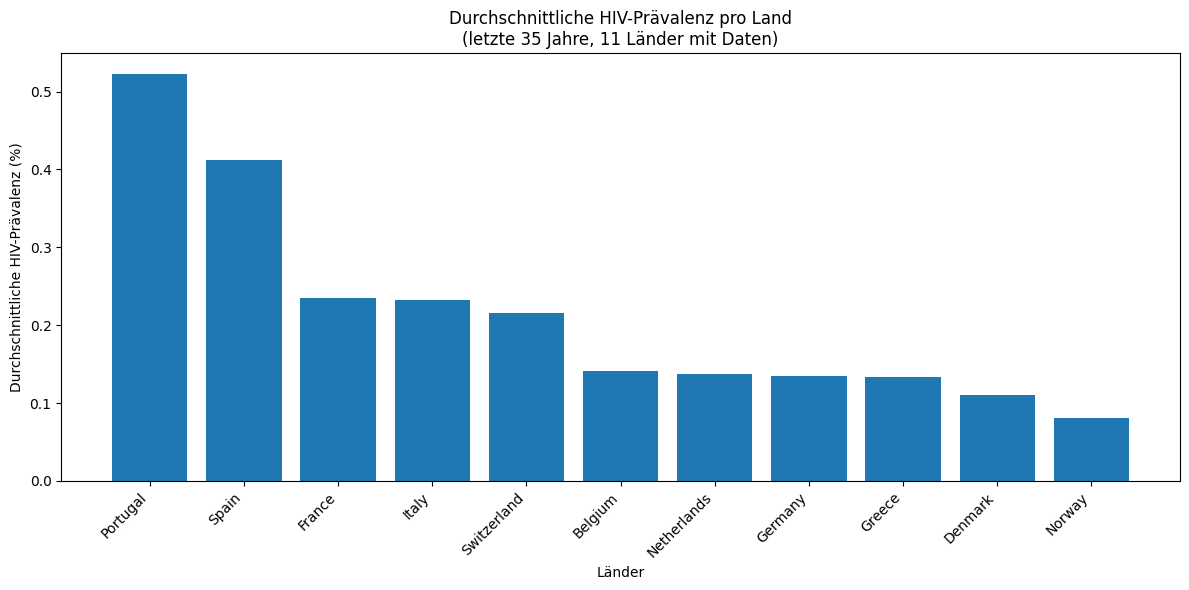

In [356]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV laden
df = pd.read_csv("https://ourworldindata.org/grapher/share-of-the-population-infected-with-hiv.csv")

# Ausgewählte Länder
selected_countries = [
    "Switzerland", "Germany", "Spain", "Portugal", "France", "Italy",
    "United Kingdom", "Netherlands", "Belgium", "Poland", "Sweden",
    "Finland", "Norway", "Denmark", "Russia", "Ukraine", "Greece"
]

# Länder filtern
df = df[df["Entity"].isin(selected_countries)]

# Letzte 35 Jahre
df = df[df["Year"] >= df["Year"].max() - 35]

# HIV-Spalte bestimmen
hiv_col = [c for c in df.columns if "hiv" in c.lower()][0]

# Durchschnitt pro Land berechnen
mean_table = df.groupby("Entity")[hiv_col].mean()

# Nur 11 Länder mit den meisten Daten auswählen
top_11 = mean_table.sort_values(ascending=False).head(11)

# Säulendiagramm
plt.figure(figsize=(12, 6))
plt.bar(top_11.index, top_11.values)

# Achsen & Titel
plt.xlabel("Länder")
plt.ylabel("Durchschnittliche HIV-Prävalenz (%)")
plt.title("Durchschnittliche HIV-Prävalenz pro Land\n(letzte 35 Jahre, 11 Länder mit Daten)")

plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


## 3. Statistik der Rohdaten (Analyse im Long-Format)
- Ist meine Variable kontinuierlich oder diskret? Falls diskret, wieviele einzigartige Klassen gibt es? Wieviele Datenpunkte pro Klasse sind vorhanden?
- Anzahl Datenpunkte (Beschreibend und Graphische Darstellung)
    - Wieviele Datenpunkte sind für die bestimmten Variabeln vorhanden?
    - Wo fehlen Datenpunkte?
- Wie ist die Verteilung der zu untersuchenden Variabel(n) (Histogram, Boxplot, Säulendiagram)
- Vermutest du Zusammenhänge zwischen zwei Variabeln (Streuungsdiagramm, Korrelationsmatrix)
### Antoworten:
- Variable HIV-Infektion (%): kontinuierlich, weil sie theoretisch jeden Wert zwischen 0 und 100 annehmen kann.
- Andere Variablen: Entity (Land): diskret, 17 einzigartige Klassen, Year: diskret, in den letzten 35 Jahren
- Anzahl Datenpunkte für HIV-Infektion: 11 Länder haben Daten

C:\Users\eliah\AppData\Local\Temp\ipykernel_9600\3901617220.py:28: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(boxplot_data, labels=selected_countries, showfliers=True)


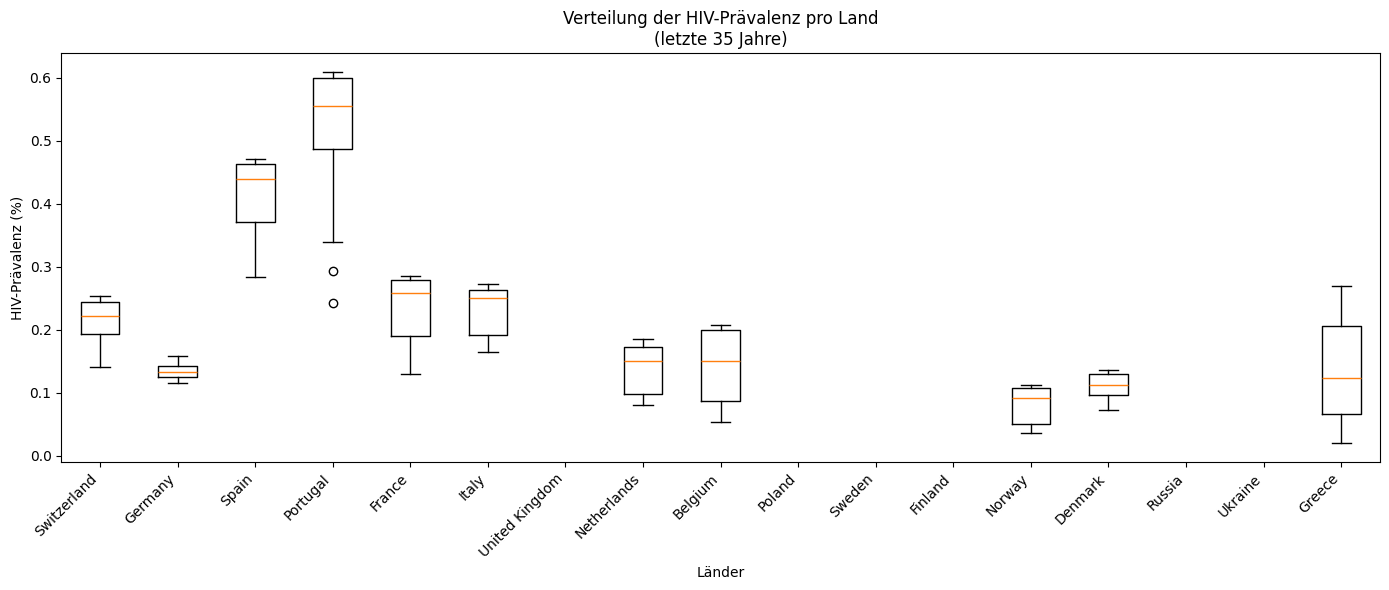

In [357]:

import pandas as pd
import matplotlib.pyplot as plt

# CSV laden
df = pd.read_csv("https://ourworldindata.org/grapher/share-of-the-population-infected-with-hiv.csv")

# Ausgewählte Länder
selected_countries = [
    "Switzerland", "Germany", "Spain", "Portugal", "France", "Italy",
    "United Kingdom", "Netherlands", "Belgium", "Poland", "Sweden",
    "Finland", "Norway", "Denmark", "Russia", "Ukraine", "Greece"
]

df = df[df["Entity"].isin(selected_countries)]
df = df[df["Year"] >= df["Year"].max() - 35]

# HIV-Spalte bestimmen
hiv_col = [c for c in df.columns if "hiv" in c.lower()][0]

# Daten für Boxplot vorbereiten
boxplot_data = [
    df[df["Entity"] == country][hiv_col].dropna()
    for country in selected_countries
]

# Boxplot erstellen
plt.figure(figsize=(14, 6))
plt.boxplot(boxplot_data, labels=selected_countries, showfliers=True)

# Beschriftungen
plt.xlabel("Länder")
plt.ylabel("HIV-Prävalenz (%)")
plt.title("Verteilung der HIV-Prävalenz pro Land\n(letzte 35 Jahre)")

plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


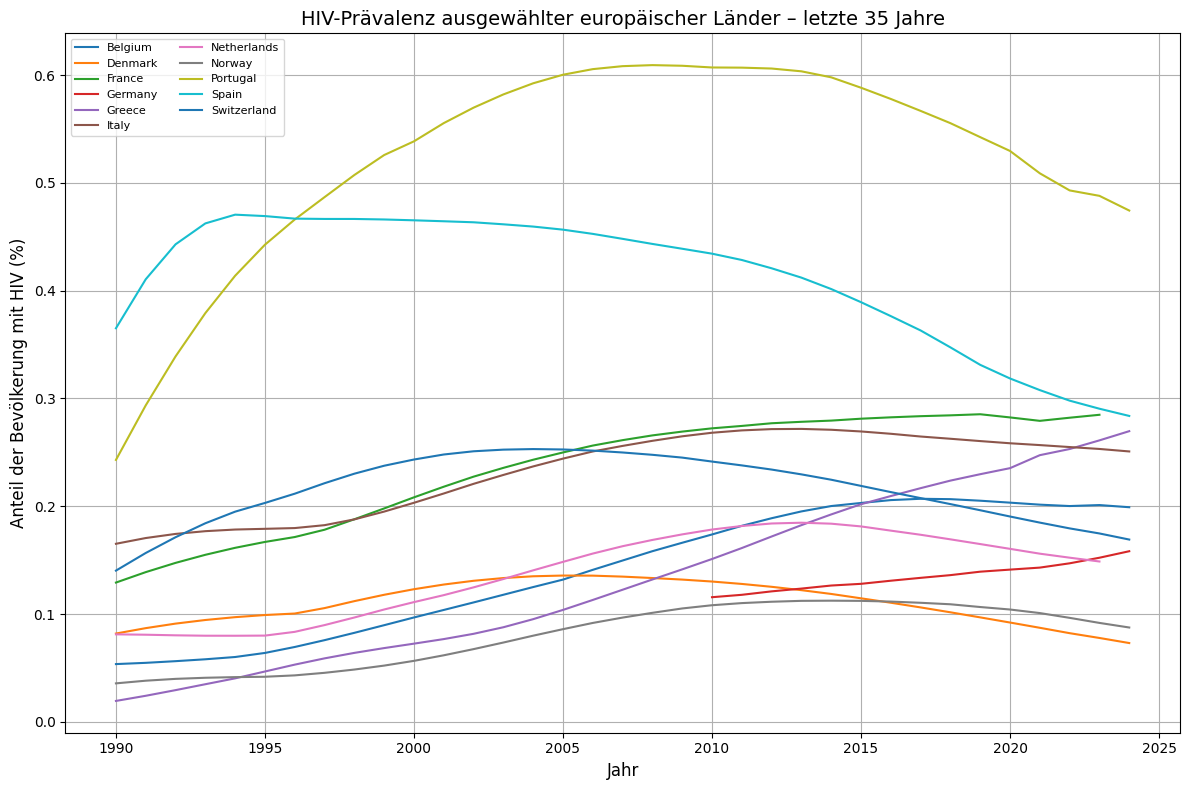

Anzahl Länder: 11
Anzahl Jahre: 35


In [361]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("https://ourworldindata.org/grapher/share-of-the-population-infected-with-hiv.csv")

selected_countries = [
    "Switzerland", "Germany", "Spain", "Portugal", "France", "Italy",
    "United Kingdom", "Netherlands", "Belgium", "Poland", "Sweden",
    "Finland", "Norway", "Denmark", "Russia", "Ukraine", "Greece"
]

df = df[df["Entity"].isin(selected_countries)]

max_year = df["Year"].max()
df = df[df["Year"] >= max_year - 35]

hiv_col = [col for col in df.columns if "hiv" in col.lower()]
if len(hiv_col) != 1:
    raise ValueError(f"Kann die HIV-Spalte nicht eindeutig bestimmen, gefunden: {hiv_col}")
hiv_col = hiv_col[0]

pivot_df = df.pivot(index="Entity", columns="Year", values=hiv_col)

plt.figure(figsize=(12,8))
for country in pivot_df.index:
    plt.plot(pivot_df.columns, pivot_df.loc[country], label=country)

plt.xlabel("Jahr", fontsize=12)
plt.ylabel("Anteil der Bevölkerung mit HIV (%)", fontsize=12)
plt.title("HIV-Prävalenz ausgewählter europäischer Länder – letzte 35 Jahre", fontsize=14)
plt.legend(fontsize=8, ncol=2)
plt.grid(True)
plt.tight_layout()
plt.show()

import pandas as pd

df = pd.read_csv("https://ourworldindata.org/grapher/share-of-the-population-infected-with-hiv.csv")

selected_countries = [
    "Switzerland", "Germany", "Spain", "Portugal", "France", "Italy",
    "United Kingdom", "Netherlands", "Belgium", "Poland", "Sweden",
    "Finland", "Norway", "Denmark", "Russia", "Ukraine", "Greece"
]

df = df[df["Entity"].isin(selected_countries)]

max_year = df["Year"].max()
df = df[df["Year"] >= max_year - 35]

hiv_col = [col for col in df.columns if "hiv" in col.lower()]
hiv_col = hiv_col[0]

pivot_df = df.pivot(index="Entity", columns="Year", values=hiv_col)

num_countries = pivot_df.shape[0]

num_years = pivot_df.shape[1]

num_data_points = pivot_df.count().sum() 

print(f"Anzahl Länder: {num_countries}")
print(f"Anzahl Jahre: {num_years}")



#### Veranschaulichung des Durchschnitts der Infektionsrate ohne spezifische Länderbeschriftung


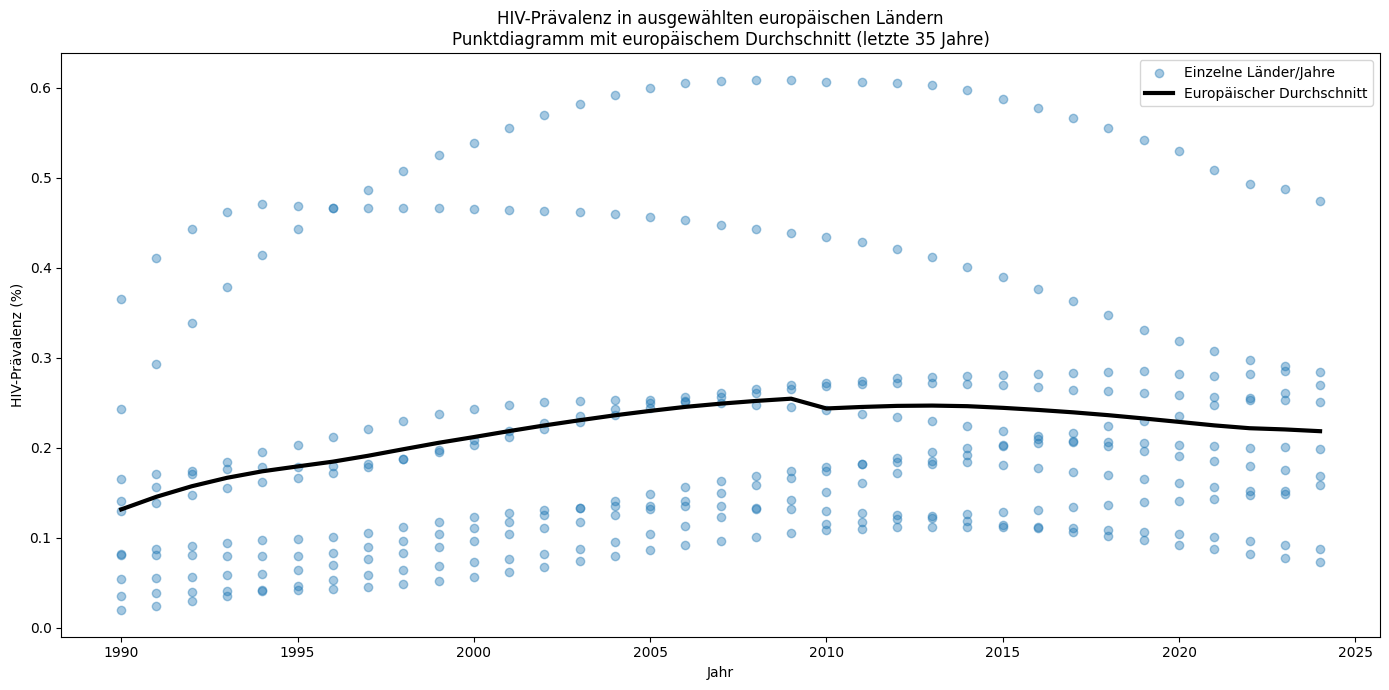

In [362]:

df = df[df["Entity"].isin(selected_countries)]
df = df[df["Year"] >= df["Year"].max() - 35]

hiv_col = [c for c in df.columns if "hiv" in c.lower()][0]

mean_per_year = df.groupby("Year")[hiv_col].mean()

plt.figure(figsize=(14, 7))

plt.scatter(
    df["Year"],
    df[hiv_col],
    alpha=0.4,
    label="Einzelne Länder/Jahre"
)

plt.plot(
    mean_per_year.index,
    mean_per_year.values,
    color="black",
    linewidth=3,
    label="Europäischer Durchschnitt"
)

plt.xlabel("Jahr")
plt.ylabel("HIV-Prävalenz (%)")
plt.title("HIV-Prävalenz in ausgewählten europäischen Ländern\nPunktdiagramm mit europäischem Durchschnitt (letzte 35 Jahre)")

plt.legend()
plt.tight_layout()
plt.show()

## 4. Analyse 

### Vorgehen
- Spezifische Untersuchung der Fragestellung (Berechnungen)
- Visualisieren der Resultate: Verwendet Achsenbeschriftung und überlegt euch, welche Art von Darstellung sinnvoll ist (Kuchen-, Säulen, Liniendiagramm; 2 y-Achsen?)
- Beschreiben der Beobachtungen
- Interpretation der Resultate (Hypothesen zu den Resultaten)
- Untermauern der Interpretation mittels Hinweise zur Literatur (Mögliche Zusammenhänge aufzeigen).



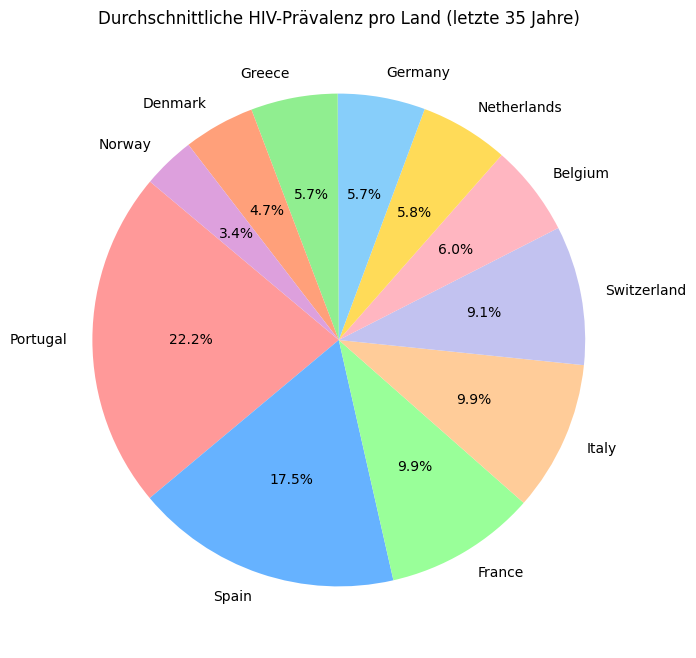

In [363]:
import matplotlib.pyplot as plt

# Daten aus dem Balkendiagramm
länder = ['Portugal', 'Spain', 'France', 'Italy', 'Switzerland', 
          'Belgium', 'Netherlands', 'Germany', 'Greece', 'Denmark', 'Norway']
prävalenz = [0.522, 0.411, 0.234, 0.232, 0.215, 0.141, 0.137, 0.135, 0.134, 0.110, 0.081]

# Farben für jedes Segment
farben = ['#FF9999','#66B2FF','#99FF99','#FFCC99','#C2C2F0','#FFB6C1',
          '#FFDB58','#87CEFA','#90EE90','#FFA07A','#DDA0DD']

# Kuchendiagramm erstellen
plt.figure(figsize=(8,8))
plt.pie(prävalenz, labels=länder, autopct='%1.1f%%', startangle=140, colors=farben)
plt.title('Durchschnittliche HIV-Prävalenz pro Land (letzte 35 Jahre)')
plt.show()

